In [ ]:
#https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels?resource=download
#데이터셋 링

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data = data.to_numpy()

input = data[:,:-1]
target = data[:,-1]

for i in range(data.shape[0]):
  if input[i,1] == 'Male':
    input[i,1] = 1
  else:
    input[i,1] = -1

  if input[i,11] == 'yes':
    input[i,11] = 1
  else:
    input[i,11] = -1
input[:,4] = input[:,11]
input = input[:,:5]

target = le.fit_transform(target)

train_input, test_input, train_target,test_target = train_test_split(input,target,test_size = 0.2)

In [12]:
rdc = RandomForestClassifier()
rdc.fit(train_input,train_target)
print(rdc.score(train_input,train_target))
print(rdc.score(test_input,test_target))

1.0
0.9479905437352246


In [13]:
rdc = RandomForestClassifier()
rdc.fit(train_input[:,2:4],train_target)
print(rdc.score(train_input[:,2:4],train_target))
print(rdc.score(test_input[:,2:4],test_target))

1.0
0.966903073286052


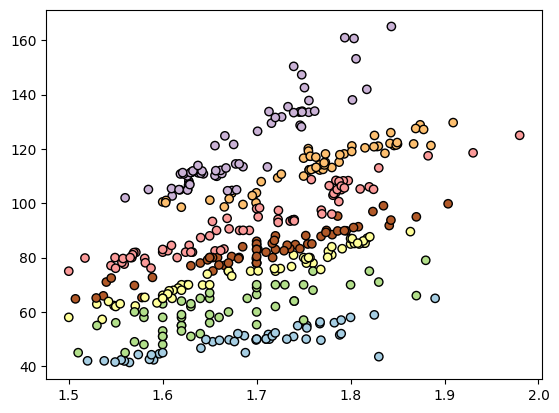

In [14]:
import matplotlib.pyplot as plt
plt.scatter(test_input[:,2],test_input[:,3],c=test_target,edgecolor='k',cmap=plt.cm.Paired)
plt.show()

In [ ]:
list(le.inverse_transform([0,1,2,3,4,5,6]))

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']